## import libraries 

In [20]:
import pandas
import configparser
import psycopg2

In [21]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db = config['myaws']['db']
user = config['myaws']['user']
pwd = config['myaws']['pwd']

In [22]:
conn = psycopg2.connect(host = host,
                       user = user,
                        password = pwd,
                        dbname = db
                       )
cur = conn.cursor()

## create the house table

make sure change the schema name to your gp number

In [23]:


# replace the schema and table name to your schema and table name
table_sql = """
            CREATE TABLE IF NOT EXISTS gp17.house1
            (

                price integer,
                bed integer,
                bath integer,
                area integer,
                address VARCHAR(200),
                PRIMARY KEY(address)
            );

            """



use the bellow cell only if you want to delete the table

In [24]:
#conn.rollback()
#table_sql="drop table if exists demo.house"

In [25]:

cur.execute(table_sql)
conn.commit()

## define the search region

In [43]:
url = 'https://www.trulia.com/VA/Alexandria/'

In [44]:


import urllib.request
response = urllib.request.urlopen(url)
html_data= response.read()
print(html_data.decode('utf-8'))



<!DOCTYPE html><html lang="en"><head><meta charSet="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                c

In [45]:


from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data,'html.parser')
print (soup)



<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><script>
            window.__uspapi = function(command, version, callback) {
              try {
                if (command === 'getUSPData') {
                  var cookies = document.cookie.split(';');
                  for (var i = 0; i < cookies.length; i++) {
                    var cookie = cookies[i];
                    var separatorIndex = cookie.indexOf('=');
                    separatorIndex = separatorIndex < 0 ? cookie.length : separatorIndex;
                    var cookie_name = decodeURIComponent(cookie.slice(0, separatorIndex).replace(/^\s+/, ''));
                    if (cookie_name === 'usprivacy') {
                      var uspString = decodeURIComponent(cookie.slice(separatorIndex + 1));
                      callback({ version: version, uspString: uspString }, true);
                      return;
                    }
                  }
                }
              } catch (ex) {
                

## insert the records into database

In [46]:

for li_class in soup.find_all('li', class_ = 'Grid__CellBox-sc-144isrp-0 SearchResultsList__WideCell-b7y9ki-2 jiZmPM'):
    try:
        for price_div in li_class.find_all('div',{'data-testid':'property-price'}):
            price =int(price_div.text.replace('$','').replace(",",""))
        for bed_div in li_class.find_all('div', {'data-testid':'property-beds'}):
            bed= int(bed_div.text.replace('bd','').replace(",",""))
        for bath_div in li_class.find_all('div',{'data-testid':'property-baths'}):
            bath =int(bath_div.text.replace('ba','').replace(",",""))
        for area_div in li_class.find_all('div',{'data-testid':'property-floorSpace'}):
            area=int(area_div.text.split('sqft')[0].replace(",",""))
        for address_div in li_class.find_all('div',{'data-testid':'property-address'}):
            address =address_div.text

        try:
            sql_insert = """
                        insert into gp17.house1(price,bed,bath,area,address)
                        values('{}','{}','{}','{}','{}')            
                        """.format(price,bed,bath,area,address)

            cur.execute(sql_insert)
            conn.commit()
        except:
            conn.rollback()
    except:
        pass
        

## Query the Table

In [47]:
df = pandas.read_sql_query('select * from gp17.house1 ', conn)
df[:10]

,price,bed,bath,area,address
0,18500000,9,15,14750,"2221 30th St NW, Washington, DC 20008"
1,1375000,4,4,2472,"3110 Quesada St NW, Washington, DC 20015"
2,1200000,3,3,2152,"323 4th St SE, Washington, DC 20003"
3,3995000,6,6,8000,"5063 Overlook Rd NW, Washington, DC 20016"
4,1250000,4,3,2295,"3517 R St NW, Washington, DC 20007"
5,949900,4,5,1939,"1315 Tuckerman St NW, Washington, DC 20011"
6,599000,2,2,880,"411 Warner St NW, Washington, DC 20001"
7,4900000,7,5,6368,"12 Logan Cir NW, Washington, DC 20005"
8,525000,3,3,2176,"950 Division Ave NE, Washington, DC 20019"
9,11950000,11,17,17631,"3301 Fessenden St NW, Washington, DC 20008"


## basic stat

In [48]:
df.describe()

,price,bed,bath,area
count,8.000000e+01,80.000000,80.000000,80.00000
mean,1.990536e+06,3.612500,3.737500,3072.01250
std,3.177635e+06,1.724681,2.646917,2992.49134
min,1.850000e+05,1.000000,1.000000,721.00000
25%,5.749750e+05,2.000000,2.000000,1300.50000
50%,8.749500e+05,3.000000,3.000000,2193.00000
75%,1.812250e+06,5.000000,5.000000,3424.50000
max,1.850000e+07,11.000000,17.000000,17631.00000


## price distribution

<AxesSubplot:>

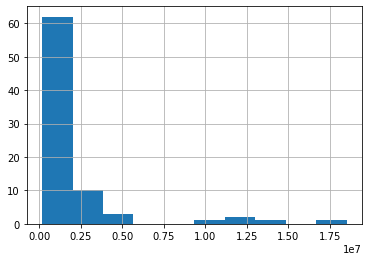

In [49]:
df['price'].hist()

## bed vs bath

<AxesSubplot:xlabel='bed', ylabel='bath'>

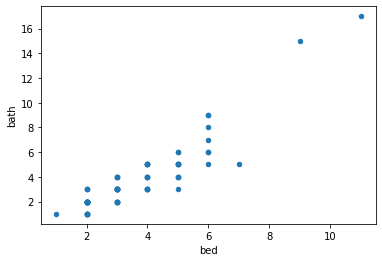

In [50]:
df.plot.scatter(x='bed',y='bath')